In [5]:
#import statements
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

<b> Bivariate normal distribution parameters: </b>
<ul>
    <li> mean_x </li>
    <li> mean_y </li>
    <li> std_x </li>
    <li> std_y </li>
    <li> corr_coeff </li>
</ul>
    
<b> Algorithm input parameters: </b>
<ul>
    <li> epsilon </li>
    <li> delta </li>
    
</ul>        

In [6]:
# parameters
mean_x = 0.0
mean_y = 0.0
std_x = 1.0
std_y = 1.0
corr_coeff = 0.5

epsilon = 0.1 #keep epsilon smaller than 0.33
delta = 0.01

var_xy = corr_coeff*std_x*std_y
var_x = std_x**2
var_y = std_y**2

mean = [mean_x, mean_y]
cov = [[var_x,var_xy], [var_xy, var_y]]

In [7]:
#helper functions

#check if point x lies in the rectangle formed with u and v
def check_in_rect(u, v, x):
    x_cond = (min(u[0], v[0]) <= x[0]) and (x[0] <= max(u[0], v[0]))
    y_cond = (min(u[1], v[1]) <= x[1]) and (x[1] <= max(u[1], v[1]))
    return (x_cond and y_cond)

#check if vector x lies in the rectangle formed with u and v
def check_in_rect_v(u,v,x):
    result = [check_in_rect(u,v,x[i]) for i in range(0,x.shape[0])]
    return result

# sample sample_size examples from the distribution
def return_sample(sample_size):
    return np.random.multivariate_normal(mean, cov, sample_size)

# return sample_size examples from the distribution along with labels
def return_labelled_sample(sample_size):
    sample = return_sample (sample_size)
    label = np.array(check_in_rect_v(u_target, v_target, sample))
    return sample, label

# define an 'unknown' target rectangle such that it has density more than 3*epsilon
def define_target_rect():
    sample_size = int(math.ceil((1.8595/epsilon)**2))
    sample = return_sample(sample_size)
    
    [x_min,y_min] = np.min(sample, axis = 0)
    [x_max,y_max] = np.max(sample, axis = 0)
    [x_mid,y_mid] = np.median(sample, axis = 0)
    
    while True:
        u = [random.uniform(x_min,x_mid),random.uniform(y_min,y_mid)]
        v = [random.uniform(x_mid,x_max),random.uniform(y_mid,y_max)]
        label = check_in_rect_v(u,v,sample)
        avg = np.average(label)
        if (avg >= 3*epsilon):
            return(u,v)
        print('Retry Finding Unknown Target Class', avg)




In [8]:
u_target, v_target = define_target_rect()
print('The Unknown target rectangle is:' , u_target, v_target)

Retry Finding Unknown Target Class 0.11560693641618497
The Unknown target rectangle is: [-2.317455158715047, -2.542357655330147] [2.979032606062205, 2.1514735584518614]


In [9]:
def get_hypothesis(sample, label):
    pos_sample = []
    for i in range(0, sample.shape[0]):
        if (label[i]==True):
            pos_sample.append(sample[i])
    
    if (len(pos_sample) == 0):
        return [0,0],[0,0]
    else:
        pos_sample = np.array(pos_sample)
        u = np.min(pos_sample, axis = 0)
        v = np.max(pos_sample, axis = 0)
        return u,v

In [10]:
train_sample_size = int(math.ceil((4/epsilon) * math.log(4/delta)))
print ('Train Sample Size is:', train_sample_size)

sample, label = return_labelled_sample(train_sample_size)

u_hyp, v_hyp = get_hypothesis(sample, label)
print('The hypothesis returned by the algorithm is:', u_hyp, v_hyp)

Train Sample Size is: 240
The hypothesis returned by the algorithm is: [-2.19991465 -2.14365623] [2.08394155 2.00889511]


Test Sample Size is: 34600
Accuracy of the hypothesis is: 0.9688439306358382


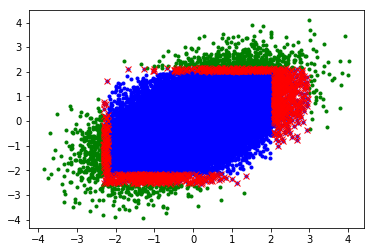

In [12]:
#PAC Demo
sample_size = int(math.ceil((1.8595/epsilon)**2))*100
print('Test Sample Size is:', sample_size)

sample, label = return_labelled_sample(sample_size)

label_pred = np.array(check_in_rect_v(u_hyp, v_hyp, sample))
label_check = (label_pred == label)

accuracy = np.average(label_check)
print('Accuracy of the hypothesis is:', accuracy)

plt.plot(sample[label == True,0],sample[label==True,1], '.', c = 'b')
plt.plot(sample[label == False,0],sample[label==False,1], '.', c = 'g')
plt.plot(sample[label_check == False,0],sample[label_check==False,1], 'x', c = 'r')


In [17]:
#Experiments
sample_size = int(math.ceil((1.8595/epsilon)**2))
print('Test Sample Size is:', sample_size)

sample, label = return_labelled_sample(sample_size)
num_runs = math.ceil(10.0/delta)
accuracy = []
threshold = [] 

for run in range(0, num_runs):
    sample_train, label_train = return_labelled_sample(train_sample_size)
    u_hyp, v_hyp = get_hypothesis(sample_train, label_train)
    # sample,label is test sample already generated
    label_pred = np.array(check_in_rect_v(u_hyp, v_hyp, sample))
    label_check = (label_pred == label)
    curr_accuracy = float(np.average(label_check))
    accuracy.append(curr_accuracy)
    threshold.append(curr_accuracy > epsilon)

correct_pred = np.count_nonzero(np.array(threshold))
incorrect_pred = sample_size - correct_pred
print('Check:' , incorrect_pred < int(delta*sample_size))


Test Sample Size is: 346
Check: True


<b> References </b>
<ul>
    <li> https://github.com/howardyclo/NTHU-Machine-Learning.git </li>
    <li> NTHU EE6550 Machine Learning </li>
</ul>